In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

import mdtraj as md
from MDAnalysis.analysis.rms import RMSF, RMSD
import MDAnalysis as mda

from ase.io import read, write
from ase.build.rotate import minimize_rotation_and_translation
import nglview as nv

from scipy.stats import binned_statistic_2d

In [3]:
plt.rcdefaults()

In [4]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 14,              
    'axes.labelsize': 12,              
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,             
    'legend.fontsize': 12,            
    'figure.titlesize': 16,            
})

plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#1f77b4", "#ff5733", "#2ca02c"])  # Custom colors

## Log file

In [ ]:
standard_trp_cage_300k =  pd.read_fwf('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/energy_files/vacuum_nvt_production_1_md_log_300K_trp_cage_standard.txt')

In [5]:
standard_trp_cage_300k.columns

Index(['Time[ps]', 'Etot/N[eV]', 'Epot/N[eV]', 'Ekin/N[eV]', 'T[K]',
       '---------------------- stress', '[GPa] -----------------------'],
      dtype='object')

In [6]:
standard_trp_cage_300k

,Time[ps],Etot/N[eV],Epot/N[eV],Ekin/N[eV],T[K],---------------------- stress,[GPa] -----------------------
0,0.0,-6.1702,-6.2074,0.0373,288.3,-0.146 -0.116 -0.114,-0.001 0.007 0.022
1,1.0,-6.1587,-6.1976,0.0389,300.7,0.014 -0.068 -0.005,0.026 -0.015 -0.009
2,2.0,-6.1602,-6.1981,0.0379,293.2,0.074 -0.039 -0.032,-0.019 0.025 0.005
3,3.0,-6.1573,-6.1968,0.0396,306.0,-0.057 0.010 0.045,-0.004 -0.058 -0.000
4,4.0,-6.1624,-6.2007,0.0383,296.1,-0.027 -0.047 -0.009,0.008 -0.005 0.022
...,...,...,...,...,...,...,...
1007,896.0,-6.1735,-6.2123,0.0388,300.1,-0.034 0.044 -0.006,0.017 -0.023 0.007
1008,897.0,-6.1708,-6.2106,0.0398,307.6,-0.034 -0.039 -0.115,-0.023 0.018 0.002
1009,898.0,-6.1671,-6.2069,0.0397,307.5,-0.074 0.012 -0.090,0.002 -0.009 0.003
1010,899.0,-6.1664,-6.2084,0.0420,324.6,0.023 -0.049 -0.037,-0.014 -0.004 -0.027


## MAE of energies...

    - Etot: Total Energy

    - Epot: Potential Energy

    - Ekin: Kinetic Energy


Etot = Epot + Ekin


**Mean Absolute Error of Potential Energies and of Force...!!!**

- Total energy over time

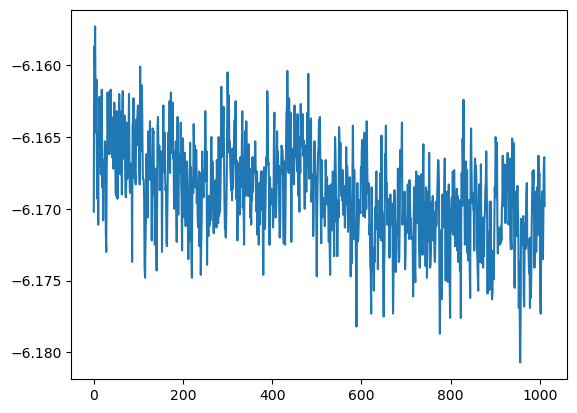

In [7]:
plt.plot(standard_trp_cage_300k['Etot/N[eV]'])

## Free energy as a function of radius of gyration (Free energy surface)

In [12]:
def radius_of_gyration(atoms):
    
    # Getting atomic position for all atoms
    positions = atoms.get_positions() 
    
    center_of_mass = atoms.get_center_of_mass()
    
    # Formula for Radius of Gyration
    rg = np.sqrt(np.mean(np.sum((positions - center_of_mass) ** 2, axis=1)))
    
    return rg

def calculate_rmsd(atoms, initial_structure):
    
    # Align the atoms with the initial structure (in terms of translation and rotation that have ocured since the start of the simulation)
    minimize_rotation_and_translation(initial_structure, atoms)
    
    # Calculate the RMSD
    diff = atoms.positions - initial_structure.positions
    rmsd = np.sqrt(np.sum(diff**2) / len(atoms))
    
    return rmsd

### 2D plot

In [ ]:
heat_498K = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_prod_1_simulation_498K_trp_cage_standard.traj", index = ":")

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_standard_498K.xyz", heat_498K)

In [54]:
len(heat_498K[:4000])

4000

In [55]:
for frame in heat_498K:
    frame.wrap()

In [ ]:
vacuum_regular_run_300K = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.xyz", index = ":")


In [47]:
len(vacuum_regular_run_300K)

2013

- Solvated Universe

In [ ]:
initial_traj_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_300K.pdb")

In [ ]:
initial_traj_solvated_universe_498K = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/solvent_full_trajectory_498K.pdb")


In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.xyz", vacuum_regular_run_300K)

In [ ]:
ref_protein = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/final_solvated_750_water_molecules_2jof_trp_cage.pdb")

In [66]:
protein = initial_traj_solvated_universe_498K.select_atoms('not resname HOH')

radii_gyration_list_498k = []

for ts in initial_traj_solvated_universe_498K.trajectory:
    
    #Ensure to wrap with pbcs
    protein.wrap()
    
    rad = protein.radius_of_gyration()
    radii_gyration_list_498k.append(rad)

In [87]:
protein = initial_traj_universe.select_atoms('not resname HOH')

radii_gyration_list_300k = []

for ts in initial_traj_universe.trajectory:
    
    #Ensure to wrap with pbcs
    protein.wrap()
    
    rad = protein.radius_of_gyration()
    radii_gyration_list_300k.append(rad)

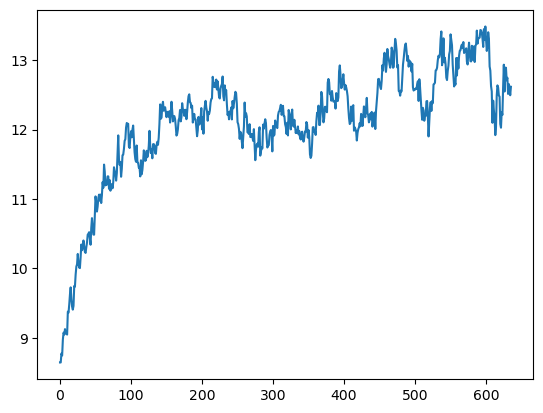

In [67]:
plt.plot(radii_gyration_list_498k)

In [ ]:
R_solvent = RMSD(initial_traj_solvated_universe_498K, initial_traj_solvated_universe_498K, select="protein and backbone") 

R_solvent.run()

In [ ]:
R_solvent_300K = RMSD(initial_traj_universe, initial_traj_universe, select="protein and backbone") 

R_solvent_300K.run()

In [69]:
# Constants
k_B = 0.001987  
T = 300  

#protein = protein_universe_melt.select_atoms("protein")

rg_values = np.array(radii_gyration_list_498k)/10

rmsd_values = R_solvent.results.rmsd.T[2,:]/10


# Calculate probability distribution
hist_rg, bin_edges_rg = np.histogram(rg_values, bins=35, density=True)
bin_centers_rg = 0.5 * (bin_edges_rg[:-1] + bin_edges_rg[1:])

hist_rmsd, bin_edges_rmsd = np.histogram(rmsd_values, bins=35, density=True)
bin_centers_rmsd = 0.5 * (bin_edges_rmsd[:-1] + bin_edges_rmsd[1:])

# Compute Free Energy
free_energy_rg = -k_B * T * np.log(hist_rg)
free_energy_rg -= np.min(free_energy_rg)  

free_energy_rmsd = -k_B * T * np.log(hist_rmsd)
free_energy_rmsd -= np.min(free_energy_rmsd)  

/tmp/ipykernel_76055/1685009829.py:20: RuntimeWarning: divide by zero encountered in log
  free_energy_rg = -k_B * T * np.log(hist_rg)


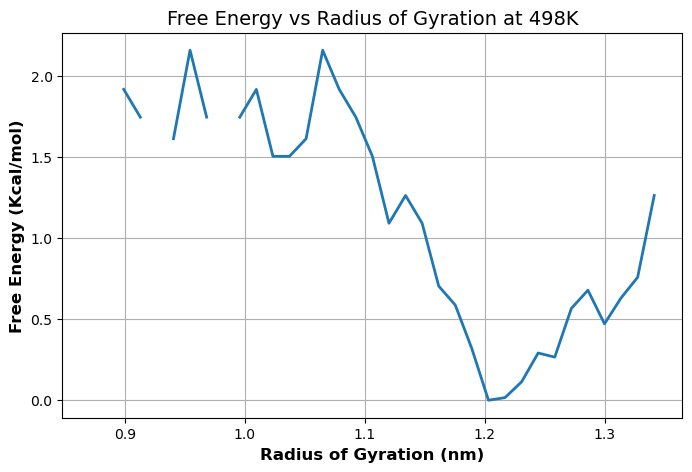

In [70]:
plt.figure(figsize=(8, 5))
plt.plot(bin_centers_rg, free_energy_rg, linewidth=2)
plt.xlabel("Radius of Gyration (nm)", fontweight = "bold")
plt.ylabel("Free Energy (Kcal/mol)", fontweight = "bold")
plt.title("Free Energy vs Radius of Gyration at 498K")
plt.grid(True)
plt.show()


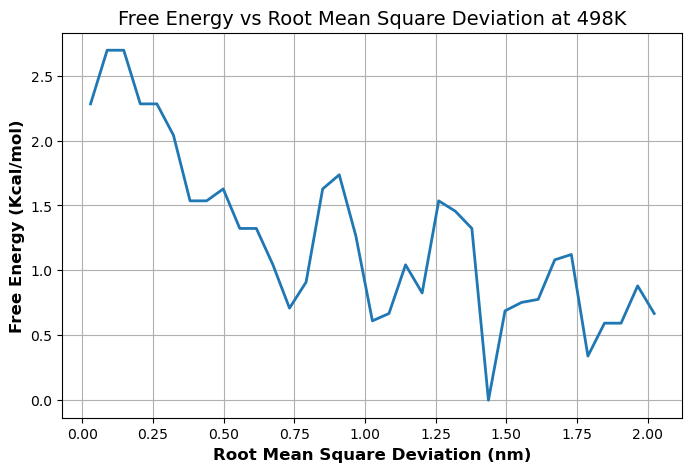

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(bin_centers_rmsd, free_energy_rmsd, linewidth=2)
plt.xlabel("Root Mean Square Deviation (nm)", fontweight = "bold")
plt.ylabel("Free Energy (Kcal/mol)", fontweight = "bold")
plt.title("Free Energy vs Root Mean Square Deviation at 498K")
plt.grid(True)
plt.show()

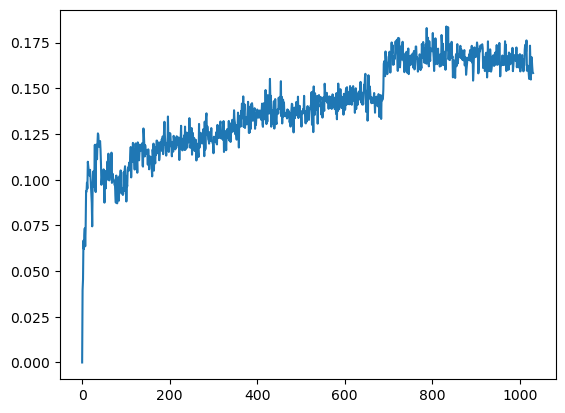

In [42]:
plt.plot(rmsd_values)

### 3D Plot

In [27]:
from scipy.ndimage import gaussian_filter
from scipy.interpolate import griddata

In [30]:
for frame in heat_498K:
    frame.wrap()

In [59]:
len(vacuum_regular_run_300K)

2013

In [116]:
# rg_values = []
# rmsd_values = []

# reference = vacuum_regular_run_300K[:4000][0]

# for frame in vacuum_regular_run_300K[:4000]:
#     rg_values.append(radius_of_gyration(frame))
#     rmsd_values.append(calculate_rmsd(frame, reference))  

# rg_values = np.array(rg_values)/10
# rmsd_values = R.results.rmsd.T[3,:]/10

T = 300

rg_values = np.array(radii_gyration_list_300k)/10

rmsd_values = R_solvent_300K.results.rmsd.T[2,:]/10

# 2D histogram from joint probability distribution of Radius of Gyration and RMSD
bins = 25
hist, x_edges, y_edges = np.histogram2d(rg_values, rmsd_values, bins=bins, density=True)

# Compute Free Energy
hist = np.where(hist == 0, 1e-10, hist)  
free_energy = -k_B * T * np.log(hist)
free_energy -= np.min(free_energy)  

In [117]:
pd.DataFrame(free_energy).isna().sum().sum()

0

- Does this need better smoothing or what?

In [142]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 18,              
    'axes.labelsize': 18,              
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,             
    'legend.fontsize': 18,            
    'figure.titlesize': 18,            
})

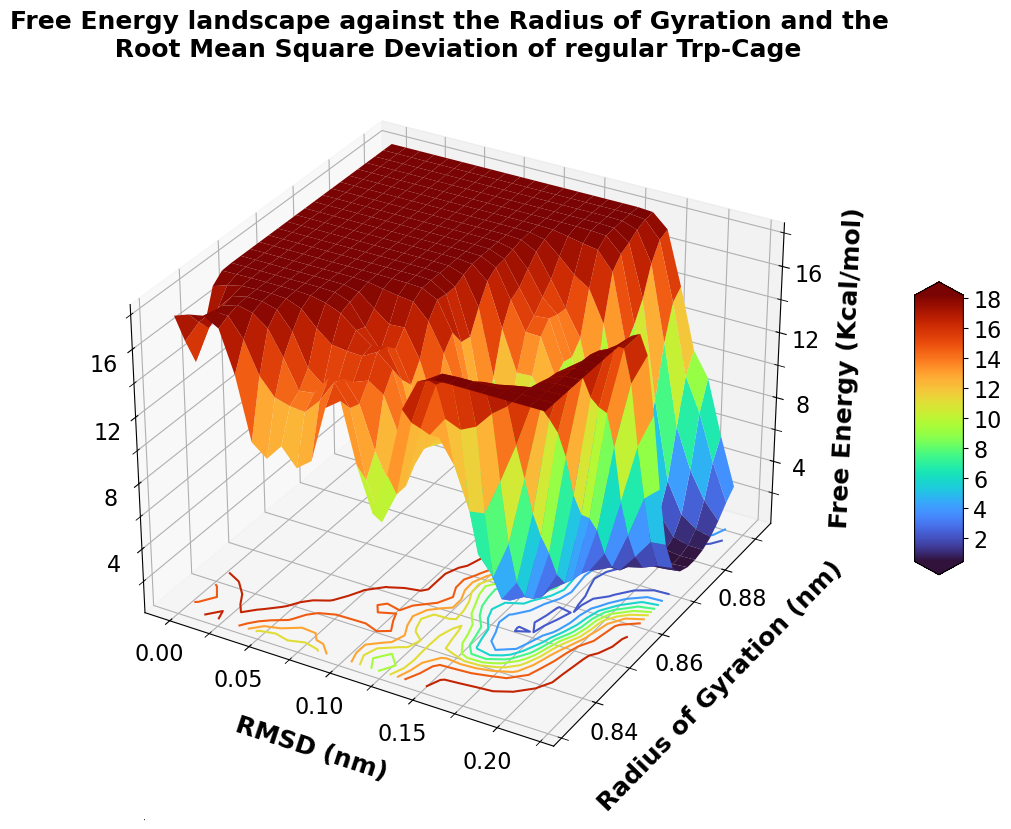

In [ ]:
# Create mesh grid for 3D surface plot
Y, X = np.meshgrid(x_edges[:-1], y_edges[:-1])

# Apply Gaussian smoothing
Z_smoothed = gaussian_filter(free_energy.T, sigma=0.99)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z_smoothed, cmap="turbo", edgecolor="none", antialiased=True)

ax.set_xlabel("RMSD (nm)", fontweight = "bold", labelpad = 15)
ax.set_ylabel("Radius of Gyration (nm)", fontweight = "bold", labelpad = 15)
ax.set_zlabel("Free Energy (Kcal/mol)", fontweight = "bold", labelpad = 10)
ax.zaxis.label.set_position((0.5, 5))

ax.zaxis.set_ticks_position('both')
ax.zaxis.set_tick_params(labelleft=True, labelright=False)

ax.set_title("Free Energy landscape against the Radius of Gyration and the \n Root Mean Square Deviation of regular Trp-Cage", fontweight = "bold")

ax.yaxis.set_minor_locator(MultipleLocator(0.01))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.zaxis.set_minor_locator(MultipleLocator(2))

# ax.set_xlim(left = 0, right = 0.5)
# ax.set_ylim(top = 1, bottom = 0.5)

# ax.view_init(elev=30, azim=220) 

ax.set_zticks([0,4,8,12,16,20])
ax.set_yticks([0.82,0.84,0.86,0.88,0.9])


contours = ax.contour(X, Y, Z_smoothed, 10, cmap='turbo', offset=np.min(Z_smoothed)-0.5)

fig.colorbar(surf, ax=ax, shrink=0.4, aspect=6, extend="both", ticks=list(range(0,25,2)), pad = 0.1)

plt.tight_layout()

fig.text(0.07, -0.010, 'b)', ha='center', va='top', fontsize=0, fontweight='bold')


plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/free_energy_landscape_regular_trp_cage.png', dpi=300, bbox_inches='tight')

plt.show()

- Free energy vs Rg and Fraction of native contacts

In [4]:
from MDAnalysis.analysis import contacts

In [ ]:
sel = "name CA"

sel_trajectory = initial_traj_solvated_universe_498K.select_atoms(sel)
sel_reference = initial_traj_solvated_universe_498K.select_atoms(sel)

ca1 = contacts.Contacts(initial_traj_solvated_universe_498K,
                        select=(sel, sel),
                        refgroup=(sel_trajectory, sel_reference),
                        radius=6.5, # described in: https://www.pnas.org/doi/10.1073/pnas.2233312100
                        method='hard_cut').run()

In [75]:
ca1_df = pd.DataFrame(ca1.results.timeseries,
                      columns=['Frame',
                               'Contacts from first frame'])
ca1_df.head()

,Frame,Contacts from first frame
0,0.0,1.000000
1,1.0,1.000000
2,2.0,0.724138
3,3.0,0.655172
4,4.0,0.586207


In [ ]:
sel = "name CA"

sel_trajectory = initial_traj_solvated_universe_498K.select_atoms(sel)
sel_reference = initial_traj_solvated_universe_498K.select_atoms(sel)

ca2 = contacts.Contacts(initial_traj_universe,
                        select=(sel, sel),
                        refgroup=(sel_trajectory, sel_reference),
                        radius=6.5, # described in: https://www.pnas.org/doi/10.1073/pnas.2233312100
                        method='hard_cut').run()

In [91]:
ca2_df = pd.DataFrame(ca2.results.timeseries,
                      columns=['Frame',
                               'Contacts from first frame'])
ca2_df.head()

,Frame,Contacts from first frame
0,0.0,0.689655
1,1.0,0.620690
2,2.0,0.689655
3,3.0,0.689655
4,4.0,0.689655


In [92]:
fraction_of_native_contacts = ca1_df['Contacts from first frame']
fraction_of_native_contacts_300k = ca2_df['Contacts from first frame']

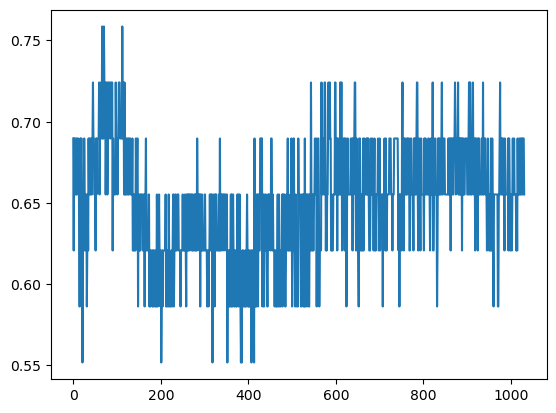

In [103]:
plt.plot(fraction_of_native_contacts_300k)

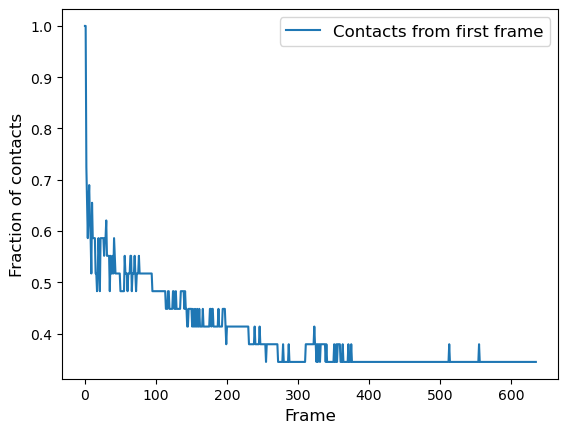

In [78]:
n_ref = ca1.initial_contacts[0].sum()

n_contacts = ca1.results.timeseries[:, 1] * n_ref

ca1_df.plot(x='Frame')
plt.ylabel('Fraction of contacts')
plt.show()

In [95]:
k_B = 0.001987  
T = 498  

rg_values = np.array(radii_gyration_list_498k)/10

native_contacts_values = fraction_of_native_contacts


# 2D histogram from joint probability distribution of Radius of Gyration and RMSD
bins = 20
hist, x_edges, y_edges = np.histogram2d(rg_values, native_contacts_values, bins=bins, density=True)

# Compute Free Energy
hist = np.where(hist == 0, 1e-10, hist)  
free_energy = -k_B * T * np.log(hist)
free_energy -= np.min(free_energy)  

In [99]:
k_B = 0.001987  
T = 300  

rg_values = np.array(radii_gyration_list_300k)/10

native_contacts_values = fraction_of_native_contacts_300k


# 2D histogram from joint probability distribution of Radius of Gyration and RMSD
bins = 20
hist, x_edges, y_edges = np.histogram2d(rg_values, native_contacts_values, bins=bins, density=True)

# Compute Free Energy
hist = np.where(hist == 0, 1e-10, hist)  
free_energy = -k_B * T * np.log(hist)
free_energy -= np.min(free_energy)  

/tmp/ipykernel_76055/3376239658.py:21: UserWarning: The following kwargs were not used by contour: 'offset'
  contours = ax.contourf(X, Y, Z_smoothed, 50, cmap='hot', offset=np.min(Z_smoothed)-0.5)


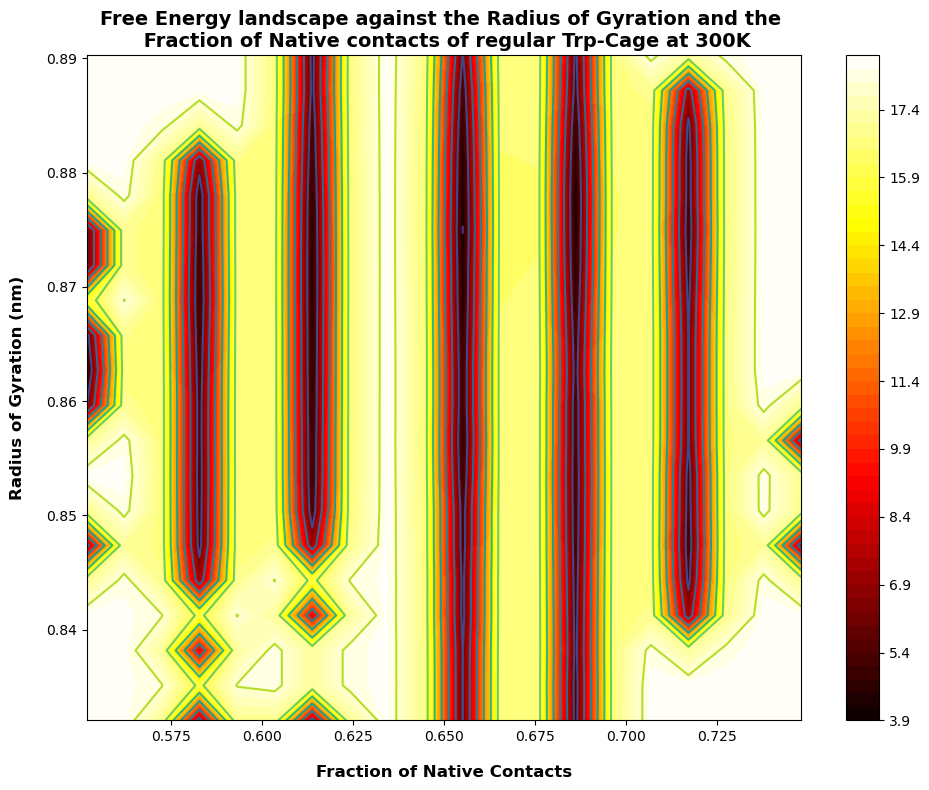

In [ ]:
# Create mesh grid for 3D surface plot
Y, X = np.meshgrid(x_edges[:-1], y_edges[:-1])

# Apply Gaussian smoothing
Z_smoothed = gaussian_filter(free_energy.T, sigma=0.5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.contour(X, Y, Z_smoothed)

ax.set_xlabel("Fraction of Native Contacts", fontweight = "bold", labelpad = 15)
ax.set_ylabel("Radius of Gyration (nm)", fontweight = "bold", labelpad = 15)

ax.set_title("Free Energy landscape against the Radius of Gyration and the \n Fraction of Native contacts of regular Trp-Cage at 300K", fontweight = "bold", loc = 'center')

# ax.set_xlim(left = 0.4, right = 0.8)
# ax.set_ylim(top = 1, bottom = 0.5)


contours = ax.contourf(X, Y, Z_smoothed, 50, cmap='hot', offset=np.min(Z_smoothed)-0.5)


cbar = plt.colorbar(contours, ax=ax)

plt.tight_layout()

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/free_energy_landscape_regular_trp_cage.png', dpi=300, bbox_inches='tight')

plt.show()

/tmp/ipykernel_76055/365434690.py:21: UserWarning: The following kwargs were not used by contour: 'offset'
  contours = ax.contourf(X, Y, Z_smoothed, 50, cmap='hot', offset=np.min(Z_smoothed)-0.5)


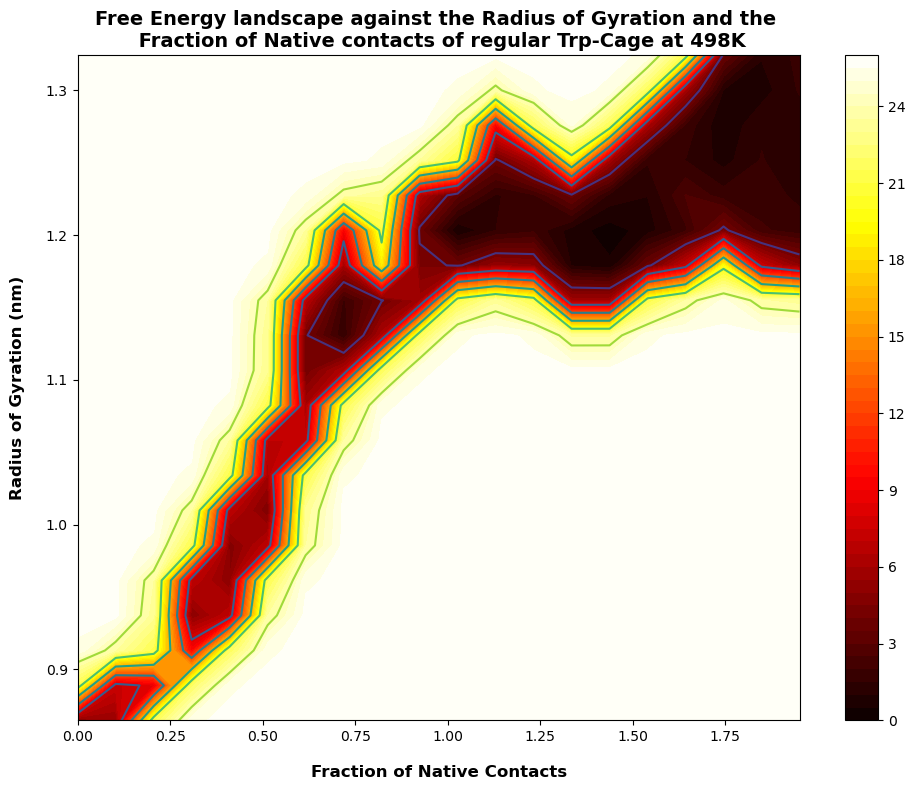

In [ ]:
# Create mesh grid for 3D surface plot
Y, X = np.meshgrid(x_edges[:-1], y_edges[:-1])

# Apply Gaussian smoothing
Z_smoothed = gaussian_filter(free_energy.T, sigma=0.5)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

plt.contour(X, Y, Z_smoothed)

ax.set_xlabel("Fraction of Native Contacts", fontweight = "bold", labelpad = 15)
ax.set_ylabel("Radius of Gyration (nm)", fontweight = "bold", labelpad = 15)

ax.set_title("Free Energy landscape against the Radius of Gyration and the \n Fraction of Native contacts of regular Trp-Cage at 498K", fontweight = "bold", loc = 'center')

# ax.set_xlim(left = 0.4, right = 0.8)
# ax.set_ylim(top = 1, bottom = 0.5)


contours = ax.contourf(X, Y, Z_smoothed, 50, cmap='hot', offset=np.min(Z_smoothed)-0.5)


cbar = plt.colorbar(contours, ax=ax)

plt.tight_layout()

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/free_energy_landscape_regular_trp_cage.png', dpi=300, bbox_inches='tight')

plt.show()

- Count where the time resets

In [4]:
time_restarts = np.array(df.loc[df['Time[ps]'].apply(lambda x: x == 0.00)].index)[1:]

In [5]:
df.loc[time_restarts - 1, 'Time[ps]'].sum() + df.loc[len(df) - 1, 'Time[ps]']

162.2

## Other structural observables

- Secondary Structure Analysis (DSSP)

In [ ]:
traj = md.load("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.xyz", top="/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb")
sec_structure = md.compute_dssp(traj)
sec_structure

array([['C', 'C', 'H', ..., 'C', 'C', 'C'],
       ['C', 'C', 'H', ..., 'C', 'C', 'C'],
       ['C', 'C', 'H', ..., 'C', 'C', 'C'],
       ...,
       ['C', 'C', 'C', ..., 'C', 'C', 'C'],
       ['C', 'C', 'C', ..., 'C', 'C', 'C'],
       ['C', 'C', 'C', ..., 'C', 'C', 'C']], dtype='<U2')

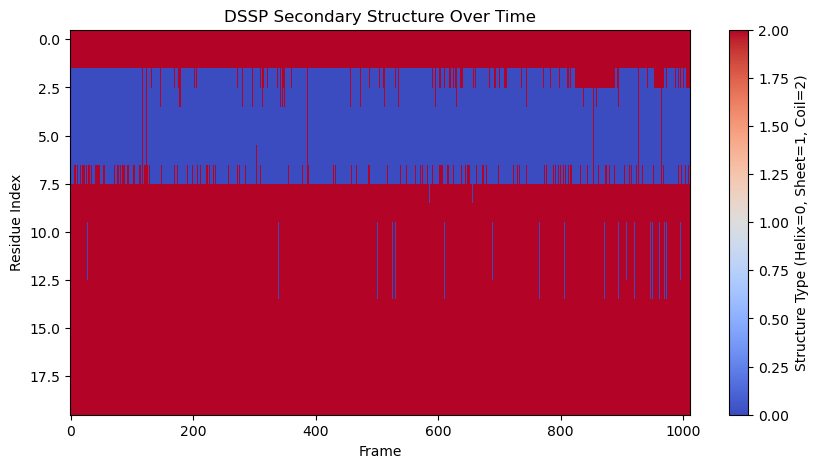

In [ ]:
ss_types = {'H': 0, 'E': 1, 'C': 2}  # Helix, Sheet, Coil
ss_numeric = np.array([[ss_types.get(ss, 2) for ss in frame] for frame in sec_structure])

plt.figure(figsize=(10, 5))
plt.imshow(ss_numeric.T, aspect="auto", cmap="coolwarm", interpolation='nearest')
plt.xlabel("Frame")
plt.ylabel("Residue Index")
plt.title("DSSP Secondary Structure Over Time")
plt.show()

- Convert to xyz

In [ ]:
protein_vacuum_traj = read()

- Root Mean Square Fluctuations (RMSF)

    - This is done in the literature when heating!

In [ ]:
protein_traj = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.traj", index = ":")

In [175]:
for frame in protein_traj:
    frame.wrap()

In [176]:
len(protein_traj)

3999

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.xyz", protein_traj)

In [ ]:
protein_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.xyz")

In [ ]:
protein_melt_retro = read("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_prod_1_simulation_498K_trp_cage_retro.traj", index = ":")

In [ ]:
for frame in protein_melt_retro:
    frame.wrap()

In [ ]:
write("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_prod_1_simulation_498K_trp_cage_retro.xyz", protein_melt_retro)

In [ ]:
protein_melt_retro_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2luf_trp_cage_retro_last_conform.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/vacuum_nvt_prod_1_simulation_498K_trp_cage_retro.xyz")

In [ ]:
protein_universe = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_300K_trp_cage_standard.xyz")


In [ ]:
protein_universe_melt = mda.Universe("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/setup_scripts/explicit_solvent/trp_cage/2jof_trp_cage_last_conform.pdb", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/analysis_scripts/trajectory_files/xyz_files/vacuum_nvt_production_1_simulation_498K_trp_cage_standard.xyz")

In [44]:
protein_universe_melt.select_atoms("protein")

<AtomGroup with 284 atoms>

In [ ]:
# Selecting Backbone Atoms (N, C, Cα) of Residues 2–8
paper_residues = protein_universe_melt.select_atoms("backbone and name N C CA and resid 2:8")

rmsf = RMSF(paper_residues).run()
#rmsf = RMSF(protein_universe.select_atoms("protein")).run()

In [60]:
print(len(paper_residues))

21


In [ ]:
protein_universe_melt.trajectory

In [ ]:
# Plot RMSF
plt.figure(figsize=(8, 4))
plt.plot((rmsf.rmsf)/10, color="blue", linewidth=2)
plt.xlabel("Residue Index")
plt.ylabel("RMSF (Angstroms)")
plt.title("Residue-wise RMSF")
plt.axhline(y=np.mean(rmsf.rmsf)/10, color='r', linestyle='dashed', label="Mean RMSF")
plt.legend()
plt.show()

## RMSD over time/trajectory for 300K and 498K

- Have to do in Vacuum because we want 5 ns simulation length

In [ ]:
R_melt = RMSD(protein_universe_melt, protein_universe_melt, select="backbone", groupselections=["backbone and name N C CA and resid 2:8"]) 

R_melt.run()

In [ ]:
protein_melt_retro_universe.atoms.wrap()

In [9]:
R_melt_retro = RMSD(protein_melt_retro_universe, protein_melt_retro_universe, select="backbone", groupselections=["backbone and name N C CA and resid 2:8"]) 

R_melt_retro.run()

In [ ]:
initial_traj_universe.atoms.wrap()

array([[14.727, 26.515,  8.499],
       [13.337, 24.705,  9.967],
       [13.955, 20.724, 12.544],
       ...,
       [16.624, 29.288, 16.396],
       [17.074, 29.57 , 17.226],
       [15.614, 29.378, 16.669]], dtype=float32)

In [10]:
R = RMSD(protein_universe, protein_universe, select="backbone", groupselections=["backbone and name N C CA and resid 2:8"]) 

R.run()

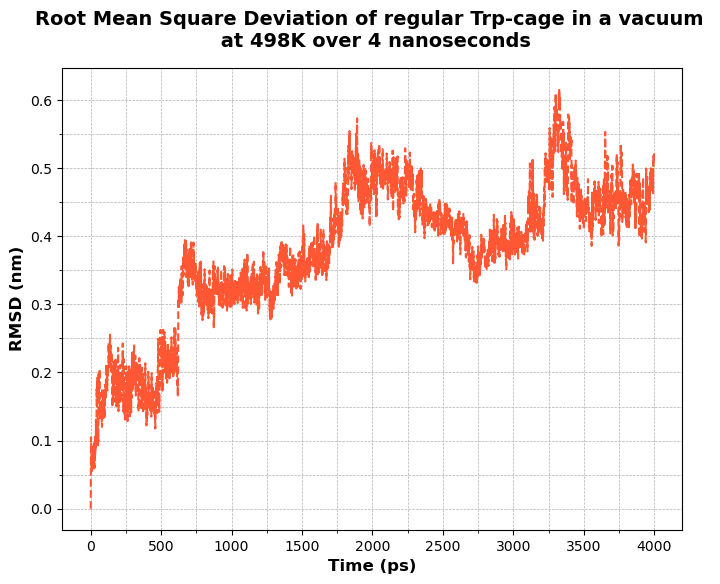

In [ ]:
rmsd_melt = R_melt.results.rmsd.T

time = rmsd_melt[1, :4000]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(time, rmsd_melt[3, :4000]/10, color = "#ff5733", linestyle = "--")
ax.set_xlabel("Time (ps)", fontweight = "bold")
ax.set_ylabel("RMSD (nm)", fontweight = "bold")

ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.grid(which = 'both', linestyle="--", linewidth=0.5)

ax.set_xticks(list(range(0,4001,500)))

plt.title("Root Mean Square Deviation of regular Trp-cage in a vacuum \n at 498K over 4 nanoseconds", pad = 15, fontweight = "bold")

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/RMSD_heated_compare.png', dpi=300, bbox_inches='tight')

plt.show()

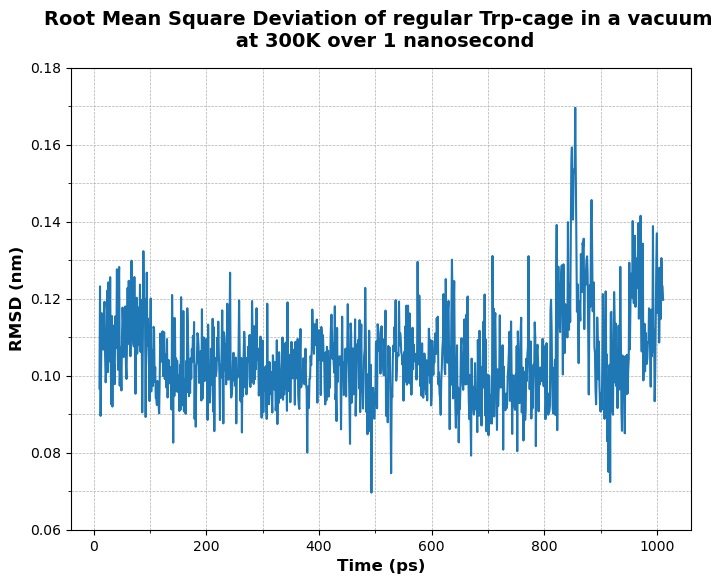

In [ ]:
rmsd = R.results.rmsd.T  

time = rmsd[1][10:]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(time, rmsd[3][10:]/10)
ax.set_xlabel("Time (ps)", fontweight = "bold")
ax.set_ylabel("RMSD (nm)", fontweight = "bold")

ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))
plt.grid(which = "both", linestyle="--", linewidth=0.5)

ax.set_xticks(list(range(0,1001,200)))
ax.set_yticks([0.06,0.08,0.1,0.12,0.14,0.16,0.18])

plt.title("Root Mean Square Deviation of regular Trp-cage in a vacuum \n at 300K over 1 nanosecond", pad = 15, fontweight = "bold")

plt.savefig("/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/RMSD_300K_compare.png", dpi=300, bbox_inches="tight")

plt.show()


# Combined

- Image overlays

In [11]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [ ]:
image_files = ["/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/retro_after_heating_image.png", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/standard_after_heating_image.png", "/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/trp_cage_image.png"]  
images = [mpimg.imread(img) for img in image_files]

In [31]:
plt.rcParams.update({
    #'axes.titleweight': 'bold',        
    'axes.titlesize': 16,              
    'axes.labelsize': 16,              
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,             
    'legend.fontsize': 14,            
    'figure.titlesize': 18,            
})

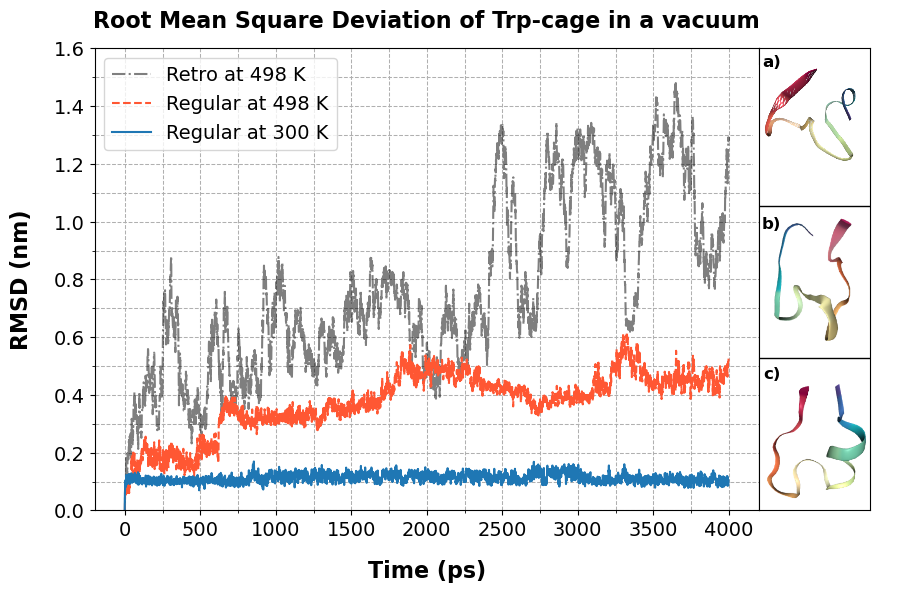

In [ ]:
rmsd = R.results.rmsd.T  

time_regular = rmsd[1]

rmsd_melt = R_melt.results.rmsd.T

time = rmsd_melt[1, :4000]

rmsd_retro_melt = R_melt_retro.results.rmsd.T

time_retro = rmsd_retro_melt[1, :4000]

fig = plt.figure(figsize=(10,6))

gs = gridspec.GridSpec(1, 2, width_ratios=[6, 1], wspace = 0) 

# ax1 = fig.add_subplot(111)
ax1 = plt.subplot(gs[0])  

ax1.plot(time_retro, rmsd_retro_melt[3, :4000]/10, alpha = 0.5, color = "black", linestyle = "-.", label = "Retro at 498 K")

ax1.plot(time, rmsd_melt[3, :4000]/10, color = "#ff5733", linestyle = "--", label = "Regular at 498 K")

ax1.plot(time_regular, rmsd[3, :4000]/10, label = "Regular at 300 K")

ax1.set_xlabel("Time (ps)", fontweight = "bold", labelpad = 15)
ax1.set_ylabel("RMSD (nm)", fontweight = "bold", labelpad = 15)

ax1.xaxis.set_minor_locator(MultipleLocator(250))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.grid(which = 'both', linestyle="--", linewidth=0.75)

ax1.set_xticks(list(range(0,4001,500)))

plt.ylim(bottom = 0, top = 1.6)

plt.legend(loc = 'upper left')

#fig.text(0.98, 0, 'b)', ha='center', va='top', fontsize=0, fontweight='bold')

plt.title("Root Mean Square Deviation of Trp-cage in a vacuum", pad = 15, fontweight = "bold")

ax2 = plt.subplot(gs[1])
ax2.set_xticks([])  
ax2.set_yticks([])  
# ax2.set_frame_on(False)  

for i, img in enumerate(images):
    if i == 2:
        zoom_level = 0.25
    else:
        zoom_level = 0.3
        
    imagebox = OffsetImage(img, zoom=zoom_level) 
    ab = AnnotationBbox(imagebox, (0.53, 0.85 - i * 0.35), frameon=False, xycoords="axes fraction", zorder=1)  
    ax2.add_artist(ab)

ax2.axhline(y=0.33, color='black', linewidth=1) 
ax2.axhline(y=0.66, color='black', linewidth=1)

fig.text(0.802, 0.87, 'a)', ha='center', va='top', fontsize=12, fontweight = "bold")
fig.text(0.802, 0.6, 'b)', ha='center', va='top', fontsize=12, fontweight = "bold")
fig.text(0.802, 0.35, 'c)', ha='center', va='top', fontsize=12, fontweight = "bold")

plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/image_overlays_RMSD_300K_and_heated_combined_compare.png', dpi=300, bbox_inches='tight')

plt.show()

## Greater unfolding for the retro structure...

In [20]:
rmsd_retro_melt = R_melt_retro.results.rmsd.T
time_retro = rmsd_retro_melt[1, :4000]

rmsd_melt = R_melt.results.rmsd.T
time = rmsd_melt[1, :4000]

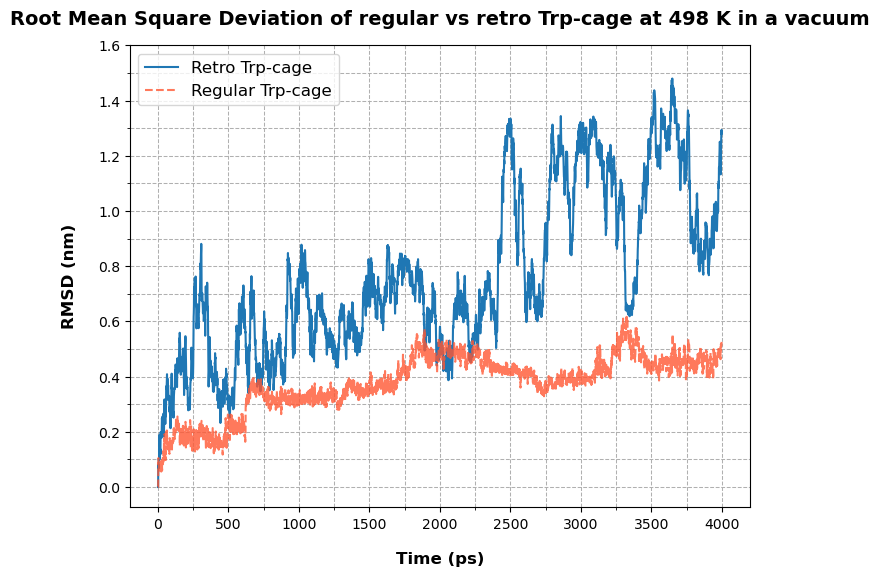

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(time_retro, rmsd_retro_melt[3, :4000]/10)
ax.plot(time, rmsd_melt[3, :4000]/10, color = "#ff5733", linestyle = "--", alpha = 0.8)

ax.set_xlabel("Time (ps)", fontweight = "bold", labelpad = 15)
ax.set_ylabel("RMSD (nm)", fontweight = "bold", labelpad = 15)

ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
plt.grid(which = 'both', linestyle="--", linewidth=0.75)

ax.set_xticks(list(range(0,4001,500)))

ax.set_ylim(top = 1.6)

plt.legend(labels = ['Retro Trp-cage', 'Regular Trp-cage'], loc = 'upper left')

plt.title("Root Mean Square Deviation of regular vs retro Trp-cage at 498 K in a vacuum", pad = 15, fontweight = "bold")

#plt.savefig('/home/user/OneDrivePersonal/Documents/MPhil_Scientific_Computing/Written_Assignments/plots_for_paper/heated_498K_regular_vs_retro_compare.png', dpi=300, bbox_inches='tight')

plt.show()

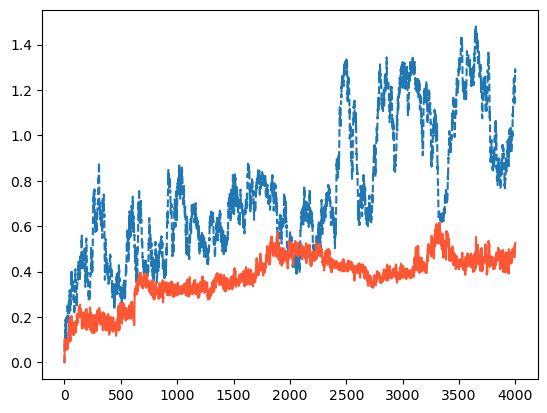

In [17]:
plt.figure()
plt.plot(time_retro, rmsd_retro_melt[3, :4000]/10, linestyle = "--")
plt.plot(time, rmsd_melt[3, :4000]/10, color = "#ff5733")

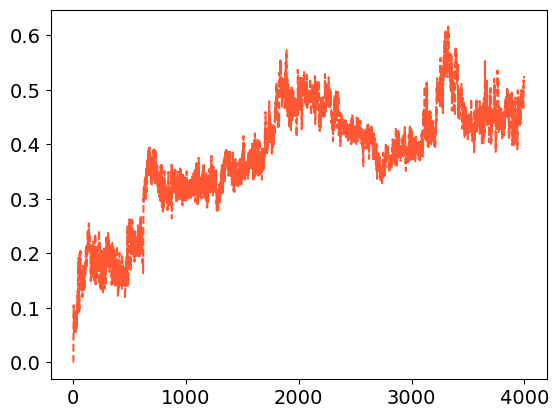

In [209]:
plt.plot(time, rmsd_melt[3, :4000]/10, color = "#ff5733", linestyle = "--")

In [205]:
protein_melt_retro_universe

<Universe with 304 atoms>

In [199]:
protein_melt_retro_universe.dimensions = [35, 35, 35, 90.0, 90.0, 90.0]
protein_universe_melt.dimensions = [35, 35, 35, 90.0, 90.0, 90.0]

In [206]:
rg_retro_498K = []

rg_regular_498K = []

protein_retro = protein_melt_retro_universe.select_atoms('not resname HOH')

for ts in protein_melt_retro_universe.trajectory:
    
    #Ensure to wrap with pbcs
    protein_retro.wrap()
    
    rad = protein_retro.radius_of_gyration()
    rg_retro_498K.append(rad)

protein_regular = protein_universe_melt.select_atoms('not resname HOH')

for ts in protein_universe_melt.trajectory:
    
    #Ensure to wrap with pbcs
    #protein_regular.wrap()
    
    rad = protein_regular.radius_of_gyration()
    rg_regular_498K.append(rad)

- From Literature...

Compare to the first plot as our system doesnt have urea

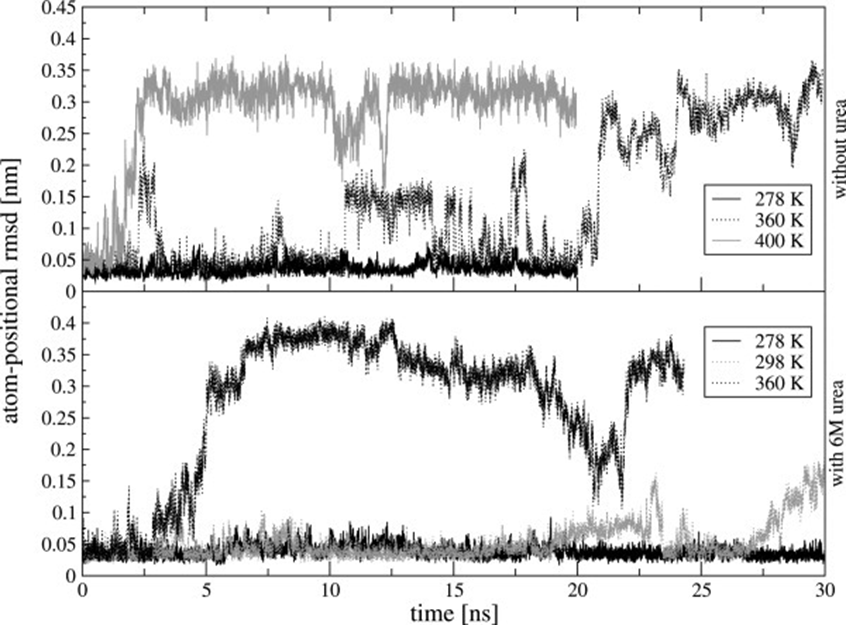